## Predict Customer Churn and Build Insights for Retention

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [440]:
df = pd.read_csv("DataSet.csv")
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,PaymentMethod,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3
0,CUST0001,Male,20,5,62.31,2950.41,Credit Card,Yes,59,20,63
1,CUST0002,Female,25,23,118.96,7460.55,Bank Transfer,No,42,41,136
2,CUST0003,Female,25,39,69.20,3064.73,Bank Transfer,No,65,0,165
3,CUST0004,Male,56,47,145.90,2612.22,Cash,No,64,40,169
4,CUST0005,Female,33,69,88.51,4833.99,Cash,No,62,1,54


In [322]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,42.41000,35.945000,82.97515,5040.986650,50.300000,24.695000,107.100000
std,15.12899,20.311939,37.92233,2802.423841,28.710476,14.474791,58.037416
min,18.00000,1.000000,20.16000,118.080000,0.000000,0.000000,2.000000
25%,29.00000,20.750000,48.72750,2454.822500,25.000000,13.000000,54.750000
50%,42.00000,37.500000,83.59500,4931.905000,51.500000,25.000000,106.500000
75%,55.00000,53.000000,115.75500,7618.195000,76.000000,37.000000,159.250000
max,69.00000,70.000000,149.44000,9984.360000,99.000000,49.000000,198.000000


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      200 non-null    object 
 1   Gender          200 non-null    object 
 2   Age             200 non-null    int64  
 3   Tenure          200 non-null    int64  
 4   MonthlyCharges  200 non-null    float64
 5   TotalCharges    200 non-null    float64
 6   PaymentMethod   200 non-null    object 
 7   Churn           200 non-null    object 
 8   ServiceUsage1   200 non-null    int64  
 9   ServiceUsage2   200 non-null    int64  
 10  ServiceUsage3   200 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 17.3+ KB


In [324]:
# Checking Null Values
df.isnull().sum() # no null values

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
Churn             0
ServiceUsage1     0
ServiceUsage2     0
ServiceUsage3     0
dtype: int64

In [325]:
cols = df.columns
cols

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'PaymentMethod', 'Churn', 'ServiceUsage1',
       'ServiceUsage2', 'ServiceUsage3'],
      dtype='object')

In [326]:
# CustomerId is an Unique feature, it can be droped
df['CustomerID'].nunique()

200

In [327]:
df.drop('CustomerID', axis=1, inplace=True)

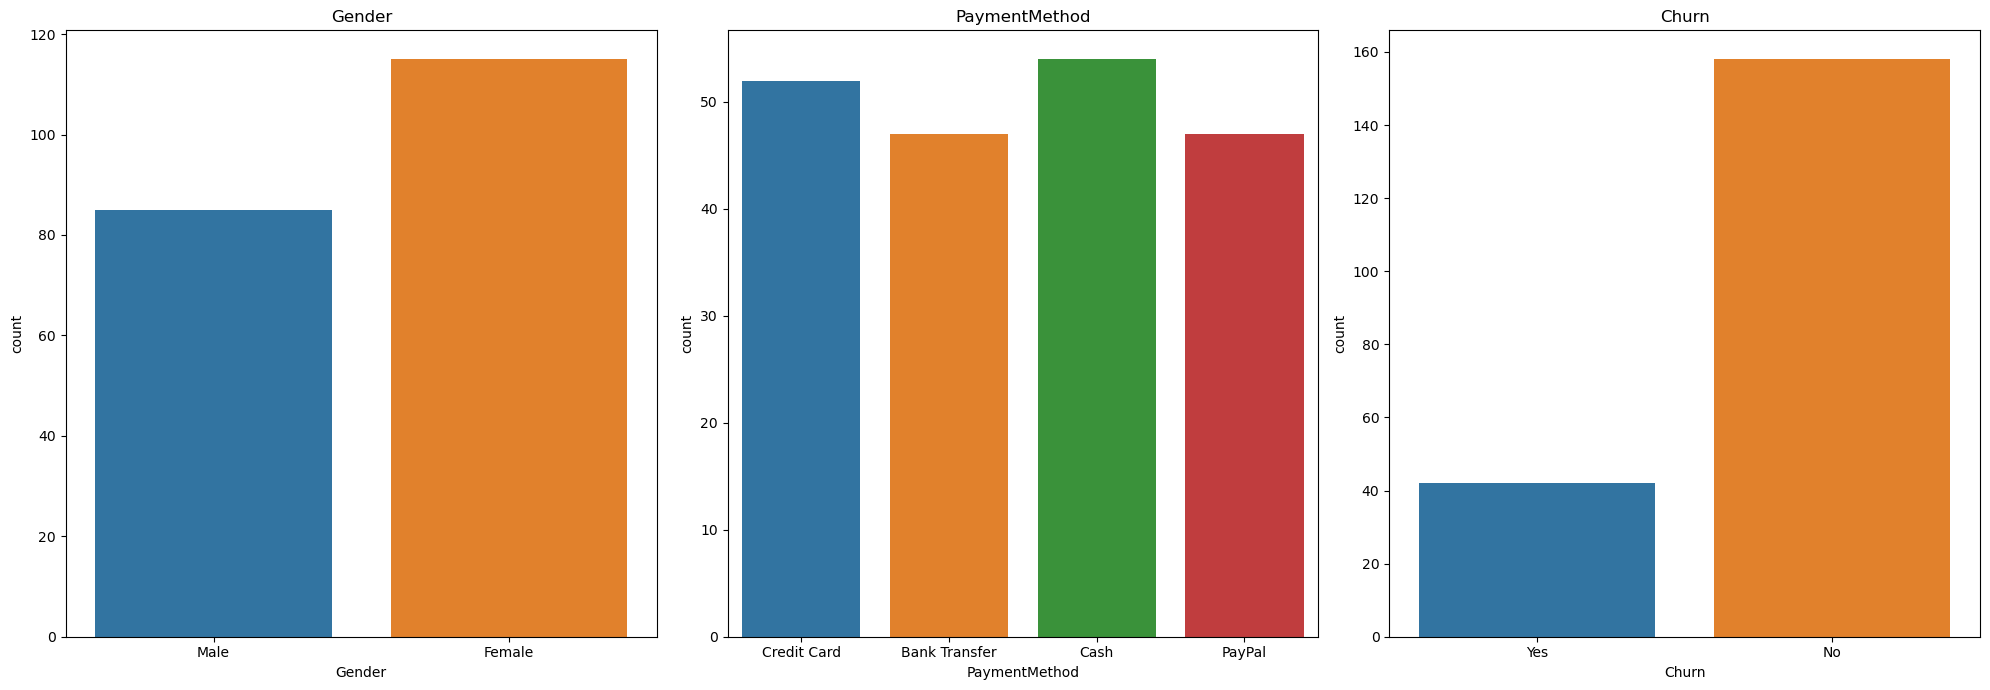

In [328]:
# Ploting each category count to check the balance in data
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
axes = axes.flatten()
columns = ['Gender', 'PaymentMethod', 'Churn']
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)


plt.tight_layout()  # Adjust layout for better appearance
plt.show()


# Result: Dataset is imbalanced


__Result__
- **Figure1:** Male and Female customers in data set are almost balance(85:115).

- **Figure2:** All the payement methods are used equally by the customers. 

- **Figure3:** There is imbalance in the data set. The number of customers who churned are less than the number of customers who did not churn.

## Feature Extraction

- **AvgMonthlySpend :** Average amount a customer spent for a month

- **TotalServiceUsage :** Sum of all 3 services

In [329]:
df['AvgMonthlySpend'] = df['TotalCharges'] / df['Tenure']
df['TotalServiceUsage'] = df[['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']].sum(axis=1)

# Exploratory Data Analysis

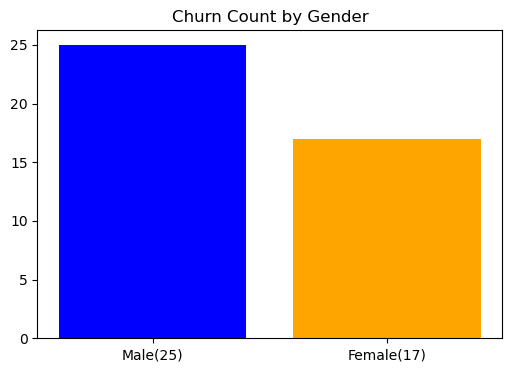

In [330]:
male_churn_count = df.loc[df['Gender'] == 'Male', 'Churn'].value_counts()['Yes']
female_churn_count = df.loc[df['Gender'] == 'Female', 'Churn'].value_counts()['Yes']

plt.figure(figsize = (6, 4))
plt.bar([f'Male({male_churn_count})', f'Female({female_churn_count})'], [male_churn_count, female_churn_count], color=['blue', 'orange'])
plt.title('Churn Count by Gender')
plt.show()

__conclusion__
- No significant difference , both male and female having almost same churn count

In [331]:
payment_methods = ['Cash', 'Credit Card', 'Bank Transfer', 'PayPal'] #df['PaymentMethod'].value_counts().index.tolist()
total_contributions = []
churn_percentages = []
for col in payment_methods:
    # Total contribution of each payment method to churn
    total_contributions.append(df.loc[df['PaymentMethod'] == col, 'Churn'].value_counts().sum()/df['Churn'].value_counts().sum()*100)
    churn_percentages.append((df.loc[df['PaymentMethod'] == col, 'Churn'].value_counts()['Yes'] / df.loc[df['Churn'] == 'Yes', 'Churn'].value_counts().sum())*100)
    #churn percentage

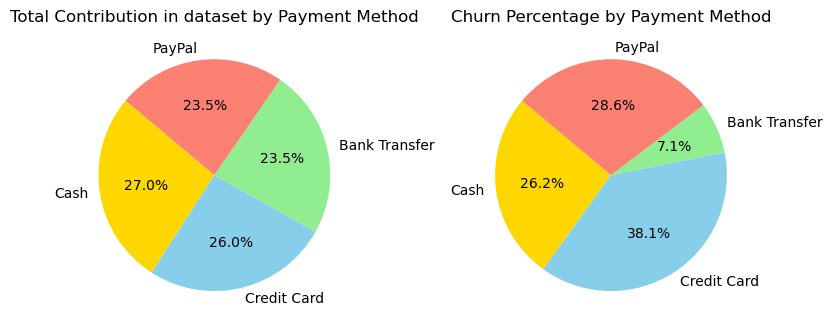

In [332]:

# Pie Chart 1: Total contribution of each payment method to churn
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.pie(
    total_contributions,
    labels=payment_methods,
    autopct='%1.1f%%',
    colors=['gold', 'skyblue', 'lightgreen', 'salmon'],
    startangle=140
)
plt.title('Total Contribution in dataset by Payment Method')

# Pie Chart 2: Contribution of each payment method to churned customers
plt.subplot(1, 2, 2)
plt.pie(
    churn_percentages,
    labels=payment_methods,
    autopct='%1.1f%%',
    colors=['gold', 'skyblue', 'lightgreen', 'salmon'],
    startangle=140
)
plt.title('Churn Percentage by Payment Method')

plt.tight_layout()
plt.show()


__Conclusion__
- All Payment categories are equally distributed in the dataset (from fig1)

- Customers who's payment method is `Bank Transfer has less churn rate` (from fig2)

- Customers who's payment method is `Credit Card has high churn rate` (from fig2)

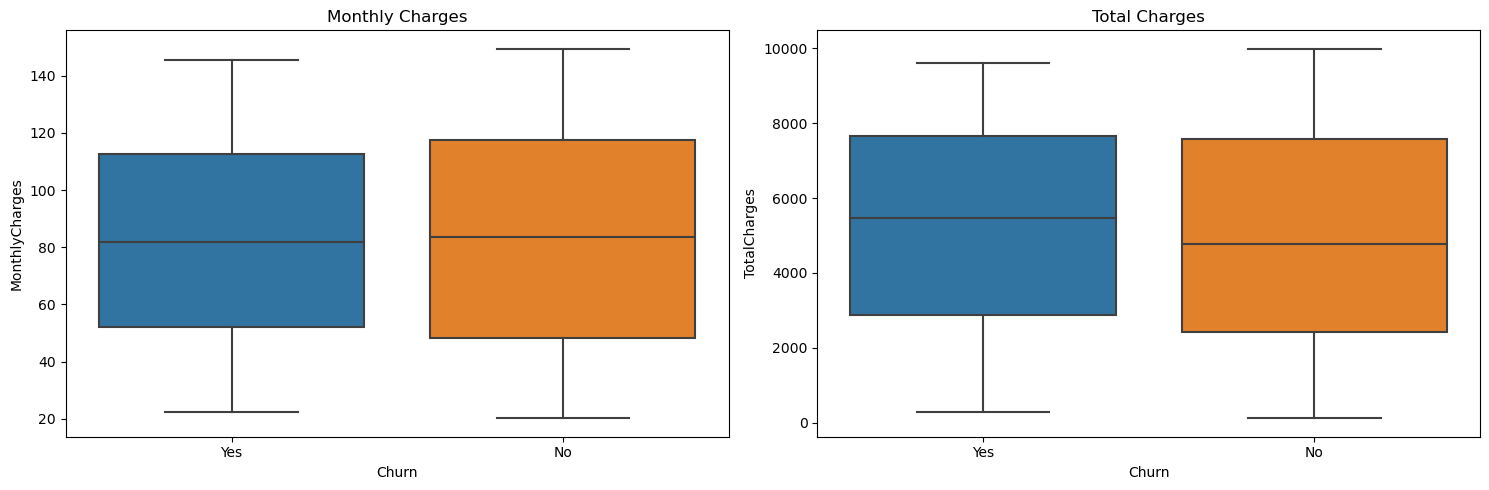

In [333]:
# Box Plot for Monthly Charges and Total Charges

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])
axes[0].set_title('Monthly Charges')

sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1])
axes[1].set_title('Total Charges')

plt.tight_layout()
plt.show()

__Conclusion__
- Average Total charges of churned customers are greater than the customers who did not churn

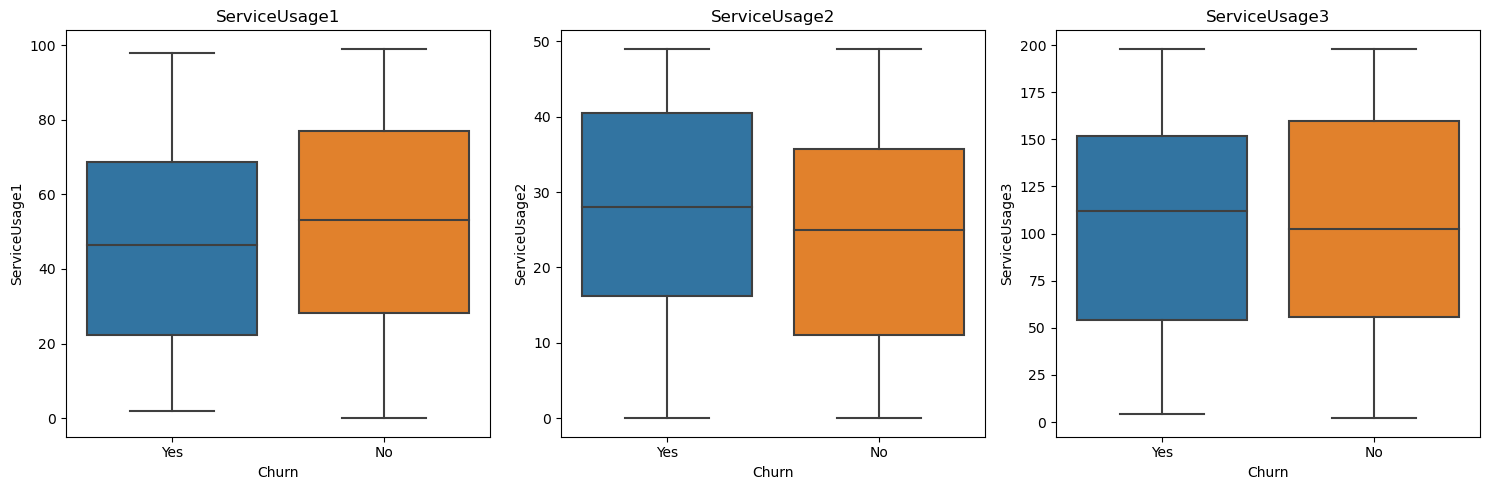

In [334]:
# Boxplot for all the Service Usage
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [335]:
# df.loc[df['ServiceUsage2'] > 38, 'Churn'].value_counts()
df.loc[df['Churn']=='Yes', ['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']].describe()

,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,42.000000,42.000000,42.000000
mean,46.523810,27.333333,106.357143
std,27.911216,14.151905,58.381346
min,2.000000,0.000000,4.000000
25%,22.250000,16.250000,54.000000
50%,46.500000,28.000000,112.000000
75%,68.750000,40.500000,152.000000
max,98.000000,49.000000,198.000000


In [336]:
df.loc[df['Churn']=='No', ['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']].describe()


,ServiceUsage1,ServiceUsage2,ServiceUsage3
count,158.000000,158.000000,158.000000
mean,51.303797,23.993671,107.297468
std,28.922851,14.522768,58.130482
min,0.000000,0.000000,2.000000
25%,28.250000,11.000000,55.500000
50%,53.000000,25.000000,102.500000
75%,77.000000,35.750000,159.750000
max,99.000000,49.000000,198.000000


#### Kernal Density Estimation (KDE) plot to better understand the distribution of the data

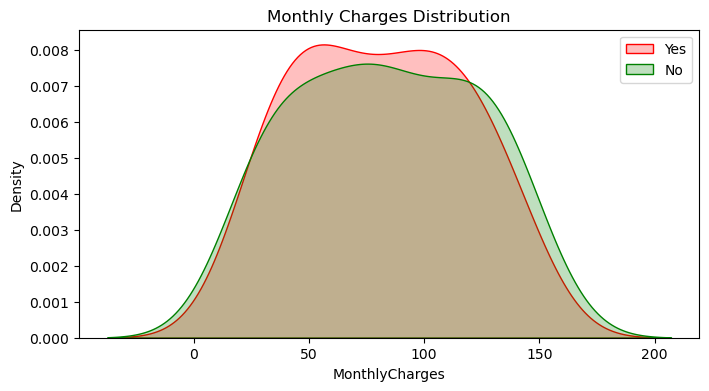

In [337]:
# kde plot for Monthly charges of churn and non-churn customers

plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == 'Yes'], color='red', label='Churn', fill=True, bw_method=0.5)
ax = sns.kdeplot(df['MonthlyCharges'][df['Churn'] == 'No'], color='green', label='Non-Churn', fill=True, bw_method=0.5)
ax.set_title('Monthly Charges Distribution')
ax.legend(["Yes","No"],loc='upper right')
plt.show()

__Conclusion__
- Customers with monthly charges between 50 - 90 are likely to churn

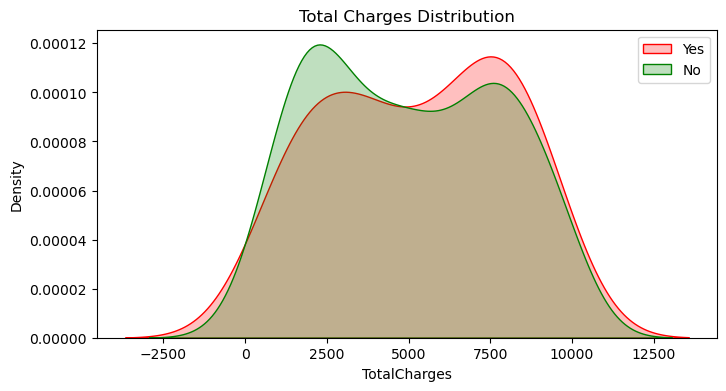

In [338]:
# kde plot for total charges of churn and non-churn customers
plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['TotalCharges'][df['Churn'] == 'Yes'], color='red', label='Churn', fill=True)
ax = sns.kdeplot(df['TotalCharges'][df['Churn'] == 'No'], color='green', label='Non-Churn', fill=True)
ax.set_title('Total Charges Distribution')
ax.legend(["Yes","No"],loc='upper right')
plt.show()


- Customers with high Total charges are likely to churn

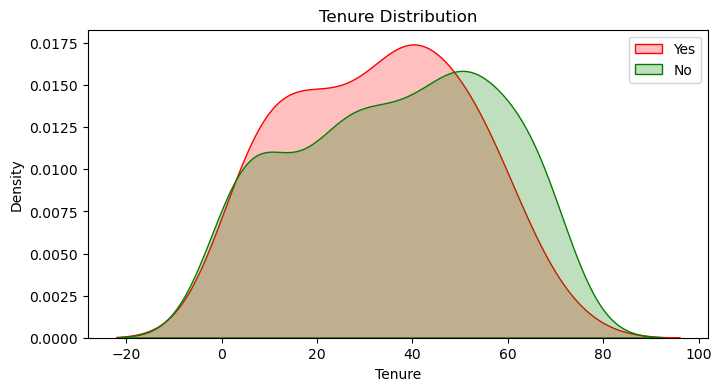

In [339]:
# kde plot for Tenure of churn and non-churn customers

plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['Tenure'][df['Churn'] == 'Yes'], color='red', label='Churn', fill=True)
ax = sns.kdeplot(df['Tenure'][df['Churn'] == 'No'], color='green', label='Non-Churn', fill=True)
ax.set_title('Tenure Distribution')
ax.legend(["Yes","No"],loc='upper right')
plt.show()

__Conclusion__
- Customers with Tenure between 10-20 and 30-45 are likely to churn

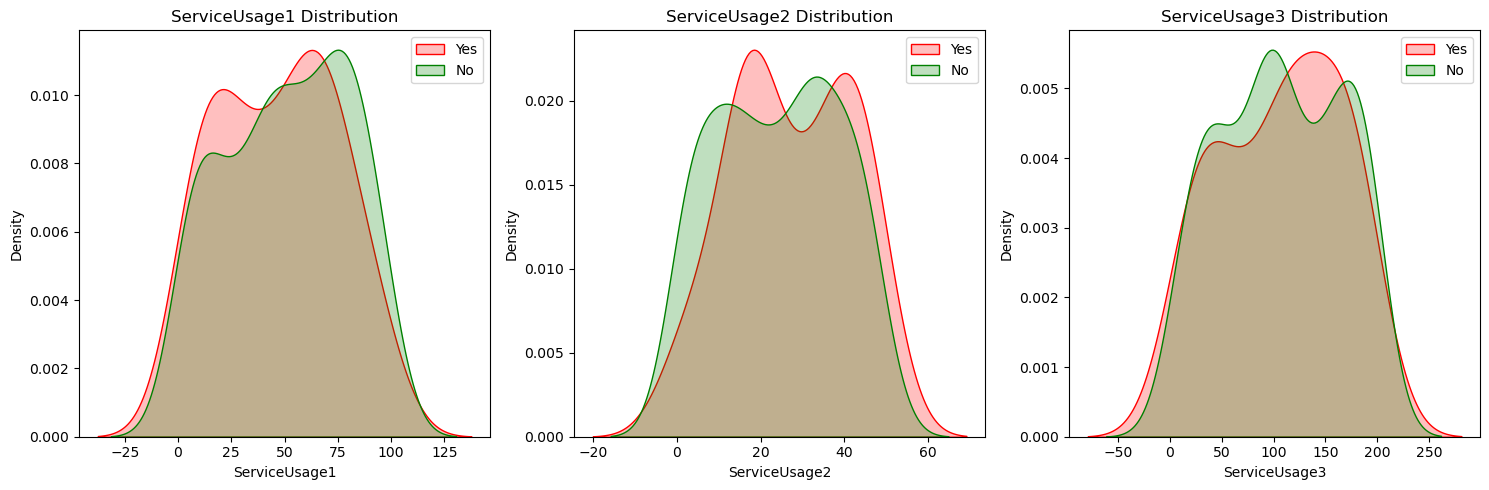

In [340]:
# kde plot for Service Usage 1, 2, 3 of churn and non-churn 

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']):
    ax = sns.kdeplot(df[col][df['Churn'] == 'Yes'], color='red', label='Churn', fill=True, ax=axes[i])
    ax = sns.kdeplot(df[col][df['Churn'] == 'No'], color='green', label='Non-Churn', fill=True, ax=axes[i])
    ax.set_title(f'{col} Distribution')
    ax.legend(["Yes","No"],loc='upper right')

plt.tight_layout()
plt.show()


__Conclusion__
- Customers with High ServiceUsage1 likely to churn

- Customers with ServiceUsage2 are churning more at all levels, so service usage2 is a good predictor for churn 

- Customers with High ServiceUsage3 likely to churn

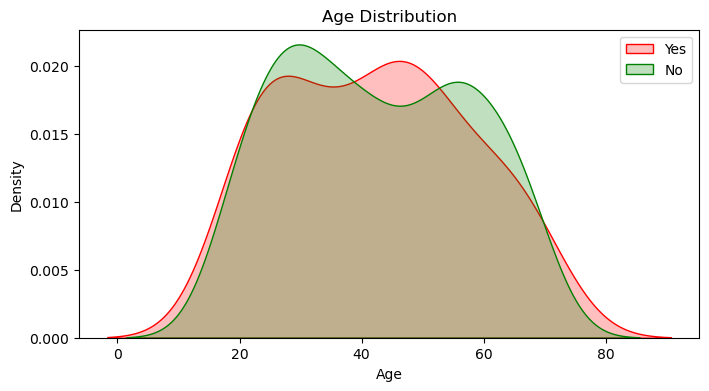

In [341]:
# kde plot for Age of churn and non-churn customers

plt.figure(figsize=(8, 4))
ax = sns.kdeplot(df['Age'][df['Churn'] == 'Yes'], color='red', label='Churn', fill=True)
ax = sns.kdeplot(df['Age'][df['Churn'] == 'No'], color='green', label='Non-Churn', fill=True)
ax.set_title('Age Distribution')
ax.legend(["Yes","No"],loc='upper right')
plt.show()


# Bi-variate Analysis

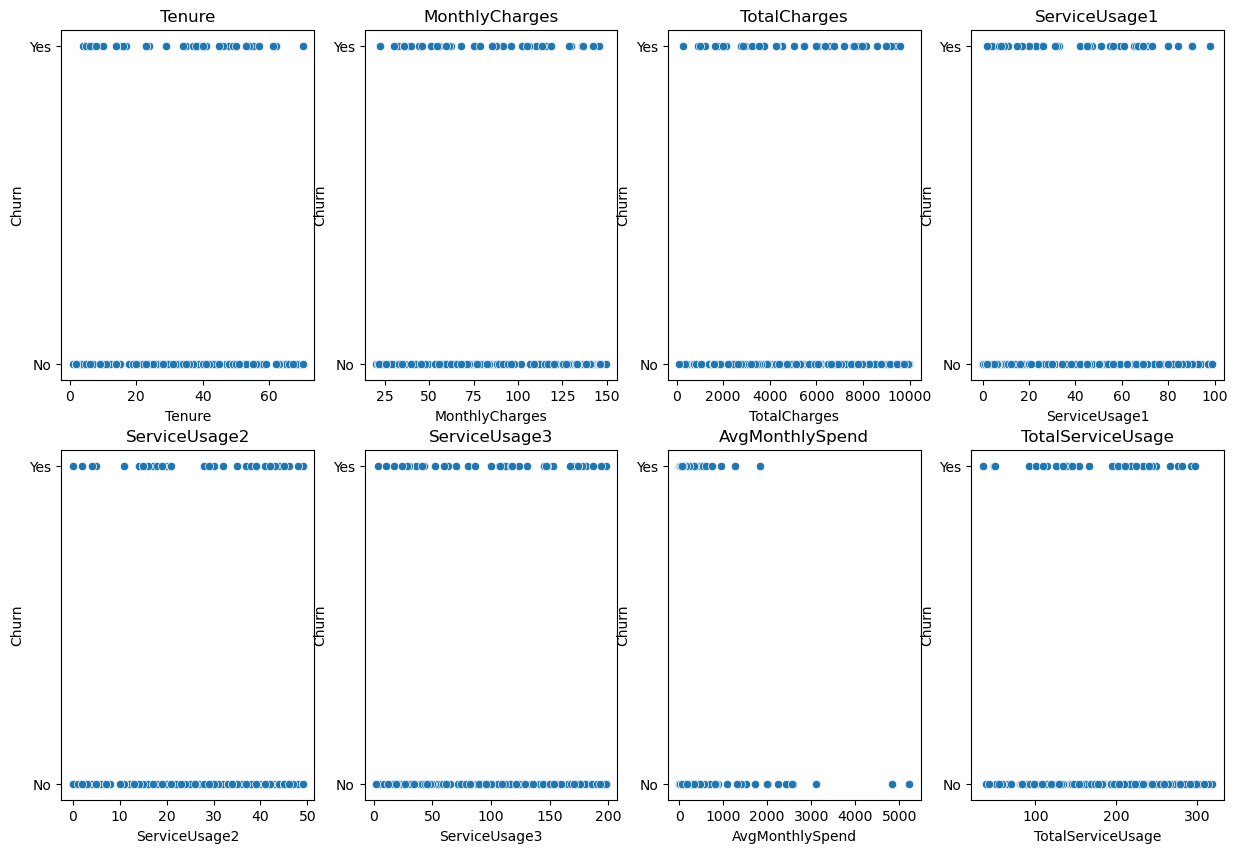

In [342]:
# Scatter Plot Between Features and Target Variable

fig, axes = plt.subplots(2, 4, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(['Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3', 'AvgMonthlySpend', 'TotalServiceUsage']):
    sns.scatterplot(x=col, y='Churn', data=df, ax=axes[i])
    axes[i].set_title(col)

__Conclusion from above plots__
 - Almost every value in every feature equally contributing to the churn
 
 - But Average Monthly Spend < 1800 has High churn Rate, it means customers who spends more than 500 on an average are retaining the subscription

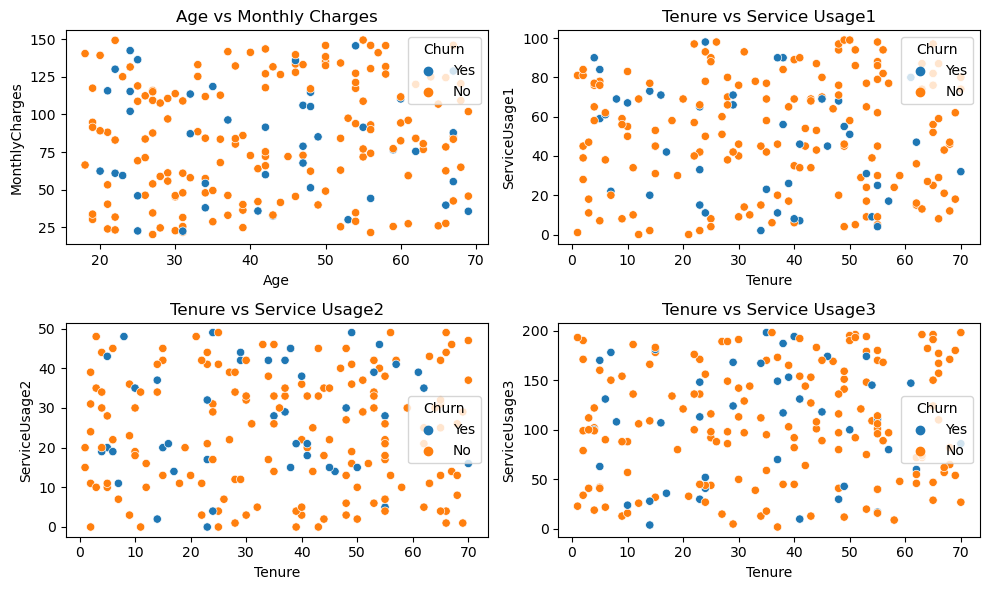

In [343]:
# Scatter Plot Between Age and Monthly Charges with subplots

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()
sns.scatterplot(x='Age', y='MonthlyCharges', data=df, ax=axes[0], hue='Churn')
axes[0].set_title('Age vs Monthly Charges')

# Scatter plot between Tenure and Service Usage1 with hue as Churn

sns.scatterplot(x='Tenure', y='ServiceUsage1', data=df, ax=axes[1], hue='Churn')
axes[1].set_title('Tenure vs Service Usage1')

# Scatter plot between Tenure and Service Usage2 with hue as Churn

sns.scatterplot(x='Tenure', y='ServiceUsage2', data=df, ax=axes[2], hue='Churn')
axes[2].set_title('Tenure vs Service Usage2')

# Scatter plot between Tenure and Service Usage3 with hue as Churn

sns.scatterplot(x='Tenure', y='ServiceUsage3', data=df, ax=axes[3], hue='Churn')
axes[3].set_title('Tenure vs Service Usage3')

plt.tight_layout()
plt.show()


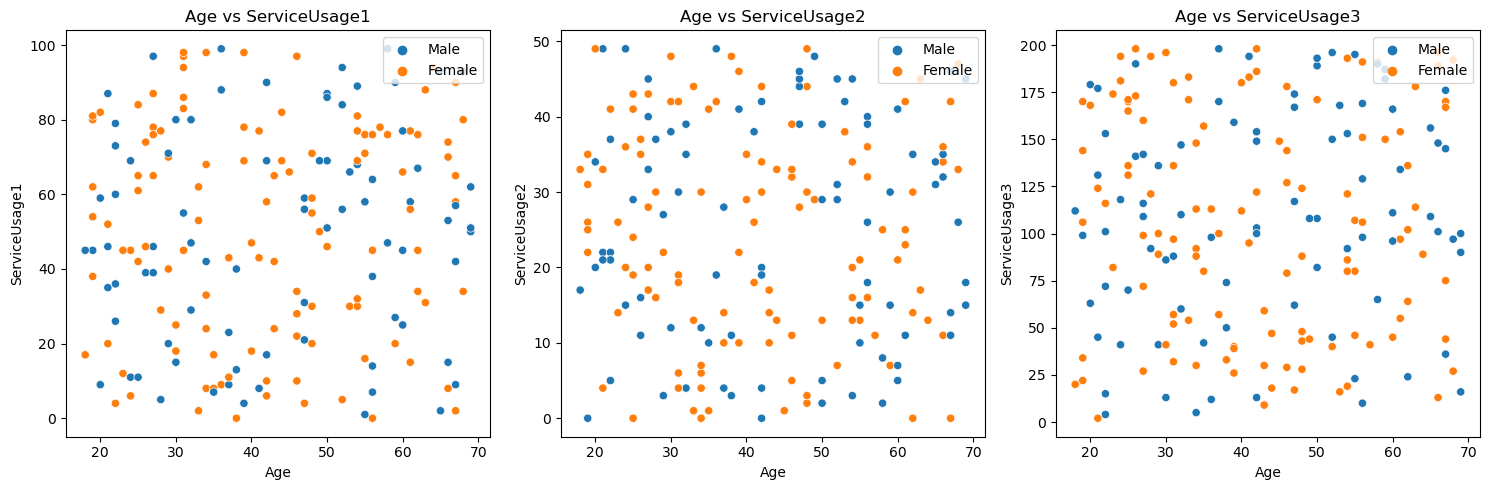

In [344]:
# Scatter Plot between Age and Service Usages with hue as Churn

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['ServiceUsage1', 'ServiceUsage2', 'ServiceUsage3']):
    sns.scatterplot(x='Age', y=col, data=df, ax=axes[i], hue='Gender')
    axes[i].set_title(f'Age vs {col}')
    axes[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

__Conclusion__
- No significant patterns in the above charts

## Encoding the Categorical Features

In [345]:
# Encoding the Churn and Gender Feature (Contains only two distinct values)
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

In [346]:
# One Hot Encoding for PaymentMethod

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

ohe.fit(df[['PaymentMethod']])
df_ohe = pd.DataFrame(ohe.transform(df[['PaymentMethod']]), columns=ohe.get_feature_names_out(['PaymentMethod']))

In [347]:
import pickle
pickle.dump(ohe, open('ohe.pkl', 'wb'))

In [348]:
df = pd.concat([df, df_ohe], axis=1)
df.drop('PaymentMethod', axis=1, inplace=True)

In [349]:
df.head(2)

,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,AvgMonthlySpend,TotalServiceUsage,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,1,20,5,62.31,2950.41,1,59,20,63,590.082000,142,0.0,1.0,0.0
1,0,25,23,118.96,7460.55,0,42,41,136,324.371739,219,0.0,0.0,0.0


## Finding the Co-relation between the features

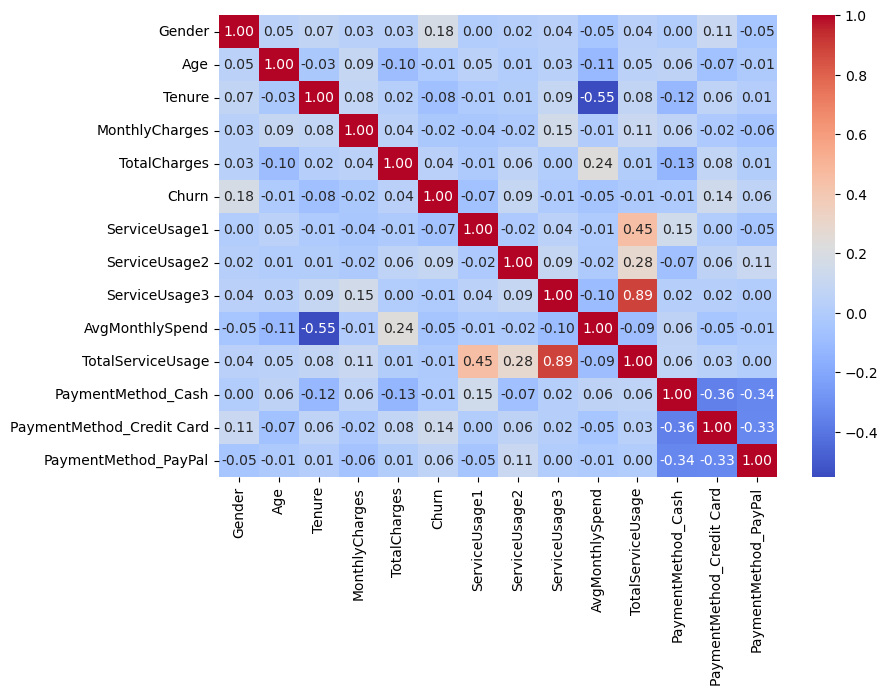

In [350]:
correlation = df.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

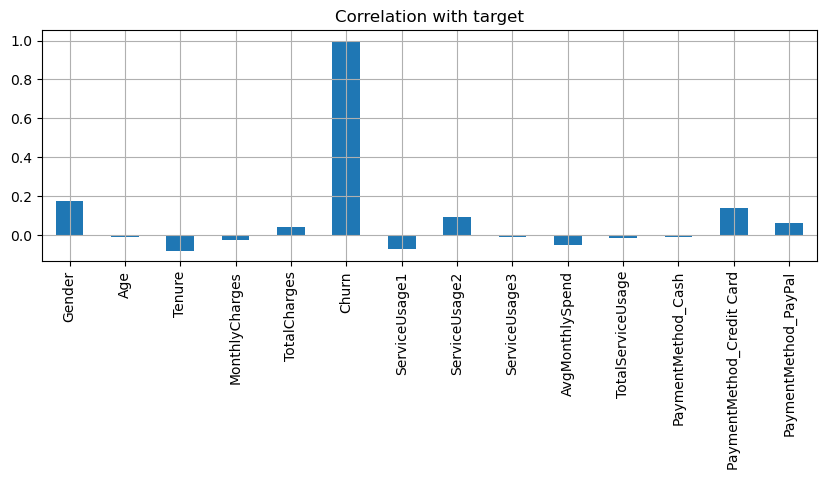

In [351]:
df.corrwith(df['Churn']).plot(kind='bar', grid=True, figsize=(10, 3), title='Correlation with target')
plt.show()

__Conclusion__
- **Age**, **TotalServiceUsage**, **PaymentMethod_Cash** has low correlation with the target variable

- All other features have moderate correlation with the target variable

In [352]:
# droping Age as it is not correlated with Churn
# Tenure as it highly correlated with AvgMonthlySpend
# TotalServiceUsage as it is highly correlated with ServiceUsage1
df.drop(['Age'], axis=1, inplace = True)

### Synthetic Minority Over-sampling Technique (SMOTE)

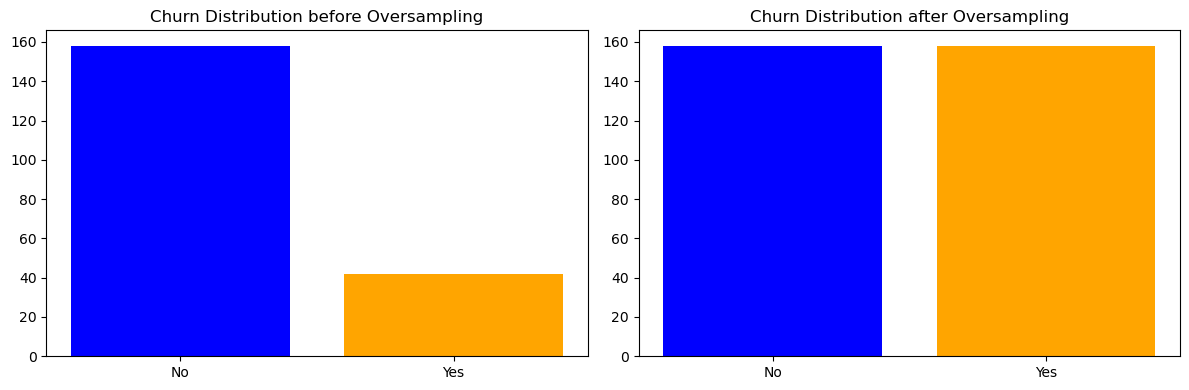

In [353]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X, y = df.drop('Churn', axis=1), df['Churn']

# Bar chart for churn before and after oversampling with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(['No', 'Yes'], [y.value_counts()[0], y.value_counts()[1]], color=['blue', 'orange'])
axes[0].set_title('Churn Distribution before Oversampling')

X, y = oversample.fit_resample(X, y)

axes[1].bar(['No', 'Yes'], [y.value_counts()[0], y.value_counts()[1]], color=['blue', 'orange'])
axes[1].set_title('Churn Distribution after Oversampling')

plt.tight_layout()
plt.show()

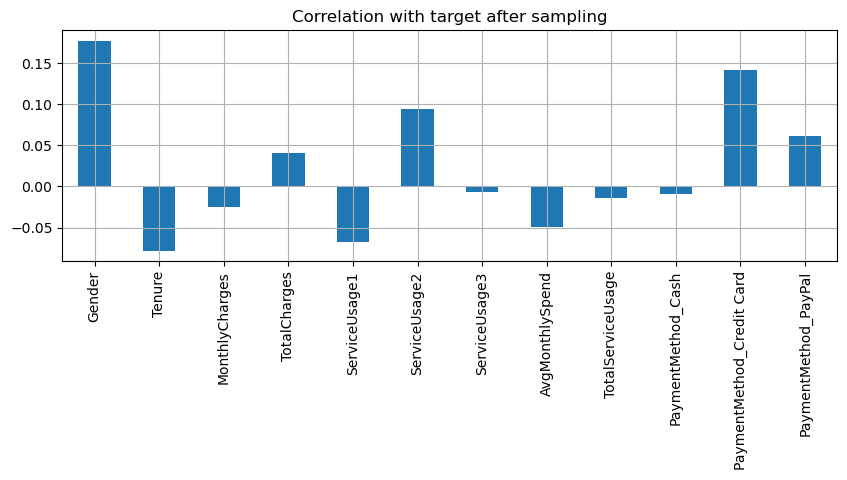

In [354]:
X.corrwith(df['Churn']).plot(kind='bar', grid=True, figsize=(10, 3), title='Correlation with target after sampling')
plt.show()

## Data Distribution

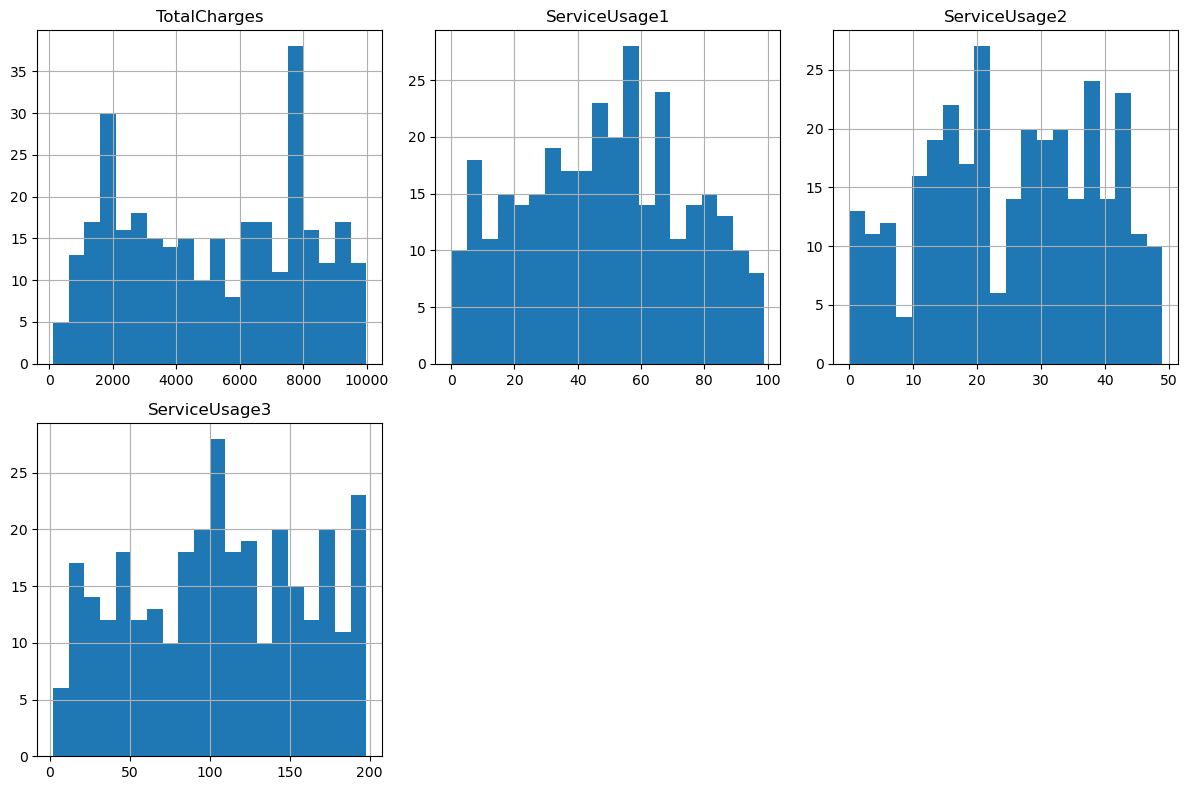

In [355]:
# Plotting the distribution of the data
X[['TotalCharges', 'ServiceUsage1','ServiceUsage2','ServiceUsage3']].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

Features are in differen scales , Standardizing the features to have mean = 0 and variance = 1

In [356]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X[['Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsage1','ServiceUsage2','ServiceUsage3', 'TotalServiceUsage','AvgMonthlySpend']])


StandardScaler()

In [357]:
scaler.mean_, scaler.scale_

(array([  35.31962025,   84.45250334, 5151.1646021 ,   48.38924051,
          25.57594937,  105.89873418,  180.24367089,  313.43609574]),
 array([  18.51485192,   34.24906469, 2785.60321665,   25.93804226,
          13.2336808 ,   54.1812114 ,   63.32661561,  567.90846432]))

['MonthlyCharges', 'TotalCharges', 'ServiceUsage1','ServiceUsage2','ServiceUsage3', 'TotalServiceUsage', 'AvgMonthlySpend']

In [358]:
X[['Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsage1','ServiceUsage2','ServiceUsage3', 'TotalServiceUsage','AvgMonthlySpend']] = scaler.transform(X[['Tenure','MonthlyCharges', 'TotalCharges', 'ServiceUsage1','ServiceUsage2','ServiceUsage3', 'TotalServiceUsage','AvgMonthlySpend']])

In [359]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [362]:
X_test.head(6)

,Gender,Tenure,MonthlyCharges,TotalCharges,ServiceUsage1,ServiceUsage2,ServiceUsage3,AvgMonthlySpend,TotalServiceUsage,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
173,0,0.360812,0.204604,-0.703447,0.216314,-0.043521,0.703219,-0.418104,0.675172,0.0,1.000000,0.000000
33,0,1.711079,-1.118060,1.530288,-0.207774,-0.874734,-0.902504,-0.304502,-1.046064,0.0,1.000000,0.000000
165,0,0.522844,0.300665,0.280031,1.218703,0.712126,1.183090,-0.319825,1.654223,0.0,0.000000,1.000000
78,0,1.062951,0.630893,-1.211973,-1.711357,0.183173,-1.640767,-0.495083,-2.072488,0.0,1.000000,0.000000
93,1,-1.637584,-1.023167,1.712152,-1.595696,-1.176993,-1.179352,2.941798,-1.914577,1.0,0.000000,0.000000
262,0,-0.179295,1.308390,-1.125822,-1.672803,1.089950,1.090807,-0.419874,0.485678,0.0,0.053603,0.946397


In [363]:
X_train.columns

Index(['Gender', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'ServiceUsage1',
       'ServiceUsage2', 'ServiceUsage3', 'AvgMonthlySpend',
       'TotalServiceUsage', 'PaymentMethod_Cash', 'PaymentMethod_Credit Card',
       'PaymentMethod_PayPal'],
      dtype='object')

In [364]:
param_grid_rf = {
    'n_estimators': [50, 75, 100, 115],
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_lr = {
    'penalty': ['l1', 'l2'], 
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

lr = LogisticRegression(max_iter=2000, random_state=42)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(random_state=42)


In [382]:
from sklearn.model_selection import GridSearchCV

print("Performing Grid Search for Random Forest...")
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)


Performing Grid Search for Random Forest...
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 115}
Best Score for Random Forest: 0.8418039215686275


In [383]:
# Decision Tree
print("\nPerforming Grid Search for Decision Tree...")
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score for Decision Tree:", grid_search_dt.best_score_)



Performing Grid Search for Decision Tree...
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score for Decision Tree: 0.7703529411764706


In [384]:
# Grid Search
print("\nPerforming Grid Search for Logistic Regression...")
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score for Logistic Regression:", grid_search_lr.best_score_)



Performing Grid Search for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.7585882352941177


## Taking Best Parameters for the Models

In [393]:
lr = LogisticRegression(**{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}, max_iter=5000, random_state=42)
rf = RandomForestClassifier(**{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50})
dt = DecisionTreeClassifier(**{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}, random_state=42)

In [394]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [395]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

## Analysing the performace of the models

In [419]:
print("Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Accuracy of Decision Tree:", accuracy_score(y_test, y_pred_dt))


Accuracy of Logistic Regression: 0.71875
Accuracy of Random Forest: 0.828125
Accuracy of Decision Tree: 0.703125


In [420]:
acc_lst = []
pre_lst = []
rec_lst = []
f1_lst = []

for pred in [y_pred_lr, y_pred_rf, y_pred_dt]:
    acc_lst.append(accuracy_score(y_test, pred))
    pre_lst.append(precision_score(y_test, pred))
    rec_lst.append(recall_score(y_test, pred))
    f1_lst.append(f1_score(y_test, pred))

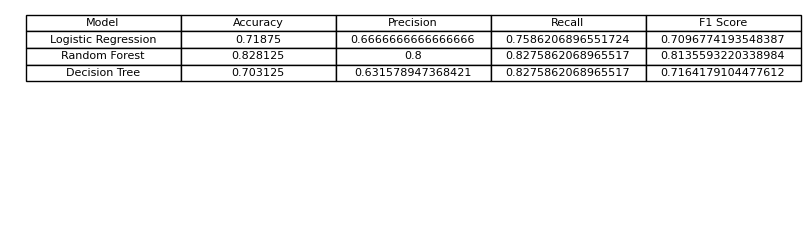

In [442]:
# Displing the perfomace in dataframe

performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': acc_lst,
    'Precision': pre_lst,
    'Recall': rec_lst,
    'F1 Score': f1_lst
})

fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')
ax.table(cellText=performance.values, colLabels=performance.columns, cellLoc='center', loc='upper left')
plt.show()

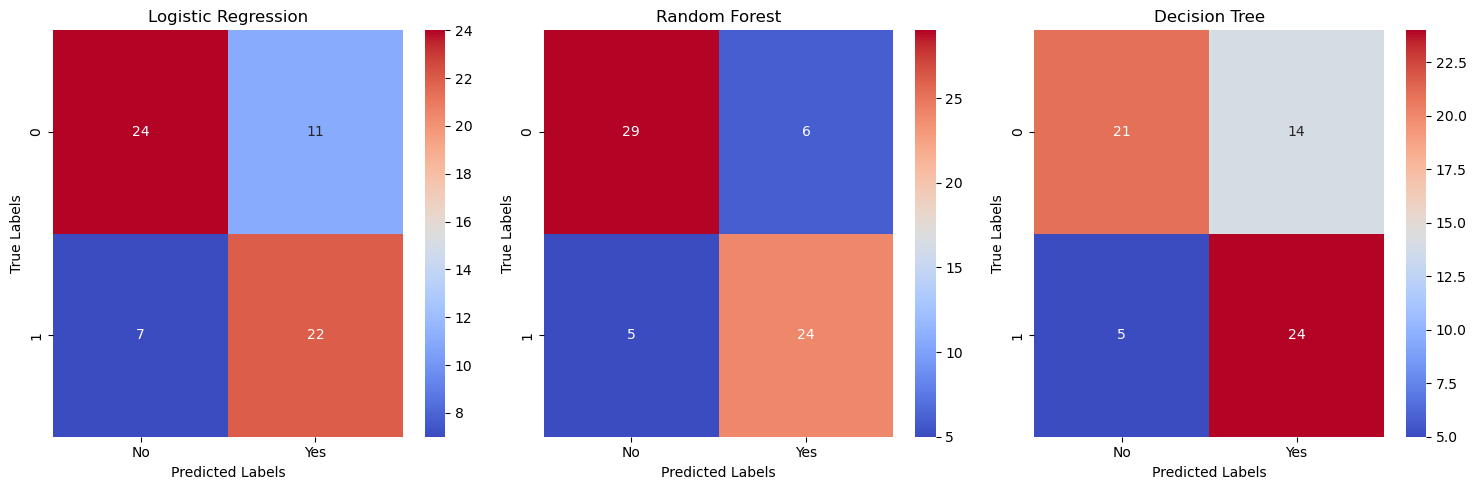

In [422]:
# Confusion Matrix for all models

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, pred in enumerate([y_pred_lr, y_pred_rf, y_pred_dt]):
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='coolwarm', ax=axes[i])
    axes[i].set_title(performance['Model'][i])
    axes[i].xaxis.set_ticklabels(['No', 'Yes'])
    
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')
    
    

plt.tight_layout()
plt.show()

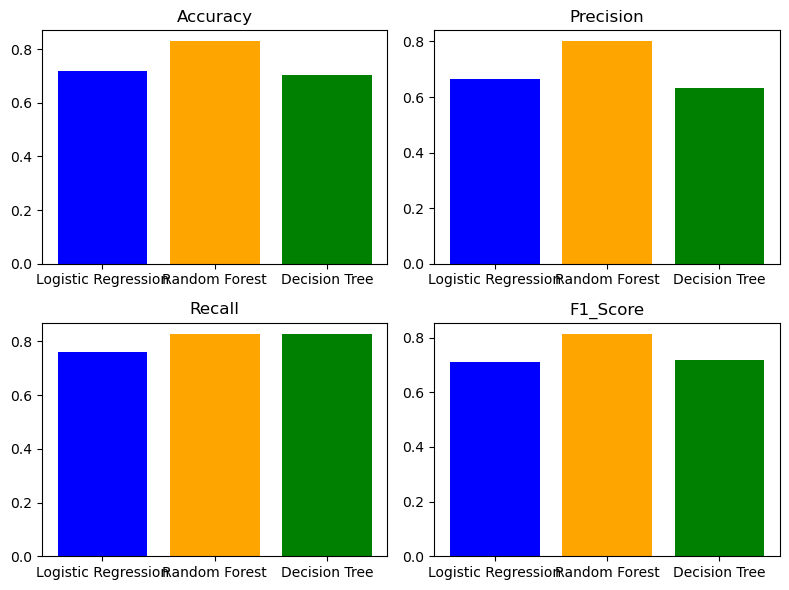

In [426]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes[0, 0].bar(models, acc_lst, color=['blue', 'orange', 'green'])
axes[0, 0].set_title('Accuracy')

axes[0, 1].bar(models, pre_lst, color=['blue', 'orange', 'green'])
axes[0, 1].set_title('Precision')

axes[1, 0].bar(models, rec_lst, color=['blue', 'orange', 'green'])
axes[1, 0].set_title('Recall')

axes[1, 1].bar(models, f1_lst, color=['blue', 'orange', 'green'])
axes[1, 1].set_title('F1_Score')

plt.tight_layout()
plt.show()

### AUC-ROC for Random Forest

In [427]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])


In [428]:
thresholds

array([ inf, 1.  , 0.98, 0.96, 0.94, 0.9 , 0.88, 0.72, 0.7 , 0.66, 0.56,
       0.54, 0.5 , 0.48, 0.46, 0.44, 0.4 , 0.38, 0.36, 0.28, 0.26, 0.24,
       0.22, 0.06])

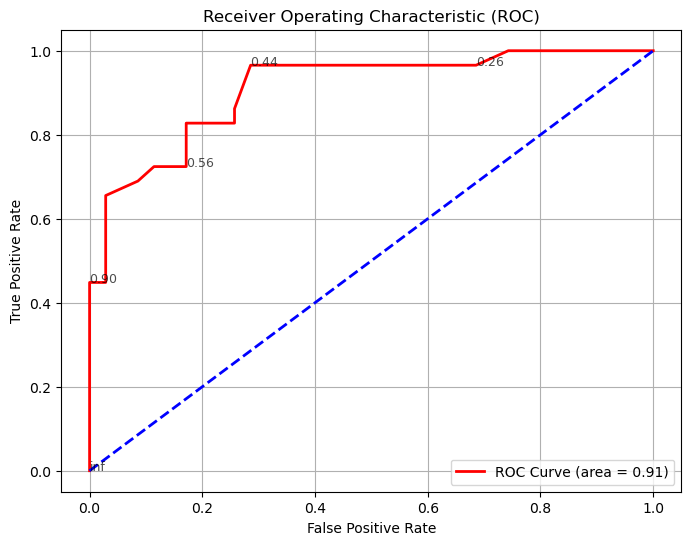

In [429]:
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

for i, threshold in enumerate(thresholds):
    if i % 5 == 0:  # Add annotations for every 5th threshold to avoid clutter
        plt.text(fpr[i], tpr[i], f'{threshold:.2f}', fontsize=9, color='black', alpha=0.7)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Save RandomForest Classifer Model

In [430]:
pickle.dump(rf, open('rf.pkl', 'wb'))

## Model Interpretation using SHAP

In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

# Create an Explainer object
explainer = ClassifierExplainer(rf, X_test, y_test)

# Launch the dashboard
ExplainerDashboard(explainer, host="127.0.0.1", port=8051).run()

### Conclusion from SHAP

#### Feature Importance using SHAP Summary Plot(Image)

<img src="assets\feature_imp.png" width="70%">


- **PaymentMethod_Credit Card** has the highest impact on the target variable i.e churn rate

- **Gender** has the least impact on the churn rate

### Random Forest Performance
<img src="assets\rfperformance.png" width="70%" height="70%">

- Maintaing the balance between Precision and Recall, Random Forest is the best model for this dataset

- AUC-ROC score of 0.909 is a good score for this dataset

### Confusion Matrix
<img src="assets\confusionmatrix.png" width="50%" height="40%">

- Random Forest is able to predict the churned customers with high accuracy

- It misclassified 7 customers who did not churn as churned customers

- It misclassified only 5 customers who churned as customers who did not churn

### Conclusion

- `We are more interested in predicting the customers who are likely to churn, so that we can take necessary actions to retain them, so we need to focus more on Recall score` 

In [436]:
df.loc[df['Churn']==1, :].head(5)

,Gender,Tenure,MonthlyCharges,TotalCharges,Churn,ServiceUsage1,ServiceUsage2,ServiceUsage3,AvgMonthlySpend,TotalServiceUsage,PaymentMethod_Cash,PaymentMethod_Credit Card,PaymentMethod_PayPal
0,1,5,62.31,2950.41,1,59,20,63,590.082000,142,0.0,1.0,0.0
10,1,17,55.33,1223.44,1,42,14,36,71.967059,92,0.0,1.0,0.0
17,1,62,87.17,7620.91,1,47,35,60,122.917903,142,0.0,0.0,1.0
29,0,15,102.07,4505.90,1,45,20,181,300.393333,246,1.0,0.0,0.0
31,0,23,32.53,6065.51,1,65,17,30,263.717826,112,1.0,0.0,0.0
